# Set Up and Data Import

In [5]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt


In [6]:
# Loading dataset
fifa_data = pd.read_csv('fifa_dataset.csv')

# Data Exploration

In [7]:
# First 5 rows
print(fifa_data.head())

       Name   Age           Club  Overall  Potential Position  Value (€M)
0  Player 1   NaN            PSG       82         83       GK       71.01
1  Player 2  37.0            PSG       88         93       RW       82.27
2  Player 3  32.0       Man City       70         71       ST         NaN
3  Player 4  28.0       Juventus       77         77       ST       85.94
4  Player 5  25.0  Bayern Munich       71         76       No      108.06


In [8]:
# Last 5 rows

print(fifa_data.tail())

           Name   Age           Club  Overall  Potential Position  Value (€M)
195  Player 196  19.0       Juventus       80         81       CB         NaN
196  Player 197  38.0       Juventus       65         70       LW       51.18
197  Player 198  29.0            PSG       60         63       CB       16.74
198  Player 199  23.0    Real Madrid       64         64       No      108.17
199  Player 200  21.0  Bayern Munich       71         75       CM       83.26


In [9]:
# Exploring dataset
print(fifa_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Name        200 non-null    object 
 1   Age         180 non-null    float64
 2   Club        180 non-null    object 
 3   Overall     200 non-null    int64  
 4   Potential   200 non-null    int64  
 5   Position    200 non-null    object 
 6   Value (€M)  180 non-null    float64
dtypes: float64(2), int64(2), object(3)
memory usage: 11.1+ KB
None


In [10]:
# Exploring the dataset
print(fifa_data.describe())

              Age     Overall   Potential  Value (€M)
count  180.000000  200.000000  200.000000  180.000000
mean    27.527778   76.390000   78.980000   63.574500
std      6.263694   10.239734   10.295123   31.967978
min     18.000000   60.000000   60.000000    2.450000
25%     22.000000   67.750000   70.000000   38.067500
50%     27.000000   76.000000   78.000000   65.235000
75%     32.000000   86.000000   88.000000   90.565000
max     39.000000   94.000000   98.000000  119.730000


# Data Cleaning

In [11]:
# Handle NAN values

# Check for missing values
print(fifa_data.isnull().sum())

Name           0
Age           20
Club          20
Overall        0
Potential      0
Position       0
Value (€M)    20
dtype: int64


In [12]:
import pandas as pd

# Fill missing Age values with the mean age
fifa_data['Age'].fillna(fifa_data['Age'].mean(), inplace=True)

# Fill missing Club values with 'Free Agent'
fifa_data['Club'].fillna('Free Agent', inplace=True)

# Renaming Value column for simplicity
fifa_data.rename(columns={'Value (€M)': 'Player Value'}, inplace=True)

# Get stats of existing player values
min_val = fifa_data['Player Value'].min()
max_val = fifa_data['Player Value'].max()

# Function to estimate player value based on a custom formula
def calculate_player_value(row):
    base_value = row['Overall'] * 100
    if row['Age'] < 30:
        age_bonus = (30 - row['Age']) * 100
    else:
        age_bonus = 0

    if row['Position'].startswith('GK'):
        position_multiplier = 1.2
    elif row['Position'] in ['CB', 'LB', 'RB', 'LWB', 'RWB']:
        position_multiplier = 1.5
    elif row['Position'] in ['CM', 'CDM', 'CAM', 'LM', 'RM']:
        position_multiplier = 1.8
    elif row['Position'] in ['ST', 'CF', 'LW', 'RW']:
        position_multiplier = 2.0
    else:
        position_multiplier = 1.0  

    estimated_raw_value = base_value + (age_bonus * position_multiplier)
    return estimated_raw_value

# Calculate raw values for rows with missing Player Value
missing_mask = fifa_data['Player Value'].isnull()
raw_values = fifa_data[missing_mask].apply(calculate_player_value, axis=1)

# Scale raw values to match the min–max of actual Player Values
scaled_values = ((raw_values - raw_values.min()) / (raw_values.max() - raw_values.min())) \
                * (max_val - min_val) + min_val

# Fill missing player values using the scaled values
fifa_data.loc[missing_mask, 'Player Value'] = scaled_values

# Check for missing values are handled
print(fifa_data.isnull().sum())


Name            0
Age             0
Club            0
Overall         0
Potential       0
Position        0
Player Value    0
dtype: int64


C:\Users\baliddeki\AppData\Local\Temp\ipykernel_11476\314477677.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  fifa_data['Age'].fillna(fifa_data['Age'].mean(), inplace=True)
C:\Users\baliddeki\AppData\Local\Temp\ipykernel_11476\314477677.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves

# Data Analysis

In [13]:
# First 20 rows after handling missing values
print(fifa_data.head(20))

         Name        Age           Club  Overall  Potential Position  \
0    Player 1  27.527778            PSG       82         83       GK   
1    Player 2  37.000000            PSG       88         93       RW   
2    Player 3  32.000000       Man City       70         71       ST   
3    Player 4  28.000000       Juventus       77         77       ST   
4    Player 5  25.000000  Bayern Munich       71         76       No   
5    Player 6  27.527778    Real Madrid       68         69       RW   
6    Player 7  24.000000      Barcelona       69         73       ST   
7    Player 8  36.000000     Free Agent       76         78       LW   
8    Player 9  28.000000       Juventus       66         66       RW   
9   Player 10  28.000000            PSG       72         73       ST   
10  Player 11  38.000000       Man City       68         68       LW   
11  Player 12  21.000000       Man City       86         86       CM   
12  Player 13  25.000000    Real Madrid       61         66     

In [14]:
# Average value of players by club
average_value_by_club = fifa_data.groupby('Club')['Player Value'].mean()
print(average_value_by_club)


Club
Barcelona        55.782000
Bayern Munich    68.932848
Free Agent       67.119826
Juventus         64.235734
Man City         63.231598
PSG              58.384733
Real Madrid      62.906031
Name: Player Value, dtype: float64


In [17]:
# Display top 10 players
top_10 = fifa_data.sort_values('Player Value', ascending=False).head(10)
print(top_10[['Name', 'Player Value', 'Age', 'Overall']])


           Name  Player Value        Age  Overall
24    Player 25    119.730000  29.000000       90
133  Player 134    119.730000  24.000000       93
154  Player 155    118.660000  27.527778       92
186  Player 187    118.260000  34.000000       86
139  Player 140    117.490000  30.000000       89
70    Player 71    117.180435  21.000000       85
107  Player 108    117.090000  29.000000       80
182  Player 183    116.970000  20.000000       84
157  Player 158    115.560000  27.527778       89
49    Player 50    115.130000  24.000000       78


In [16]:
# Compare club overall
average_overall_by_club = fifa_data.groupby('Club')['Overall'].mean()
print(average_overall_by_club.sort_values(ascending=False).head(10))  # Top 10 clubs


Club
Juventus         78.031250
Man City         77.243243
Real Madrid      77.096774
Bayern Munich    76.750000
Barcelona        75.480000
PSG              74.828571
Free Agent       74.600000
Name: Overall, dtype: float64


# Data Visualization



**Bar Chart: Player vs Value**

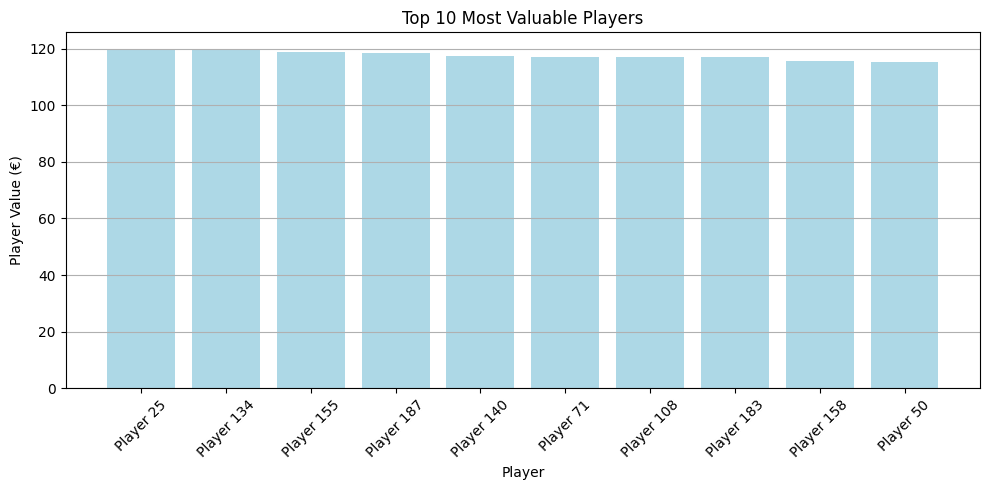

In [20]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.bar(top_10['Name'], top_10['Player Value'], color='lightblue')
plt.title('Top 10 Most Valuable Players')
plt.xlabel('Player')
plt.ylabel('Player Value (€)')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


**Scatter Plot: Age vs Overall**

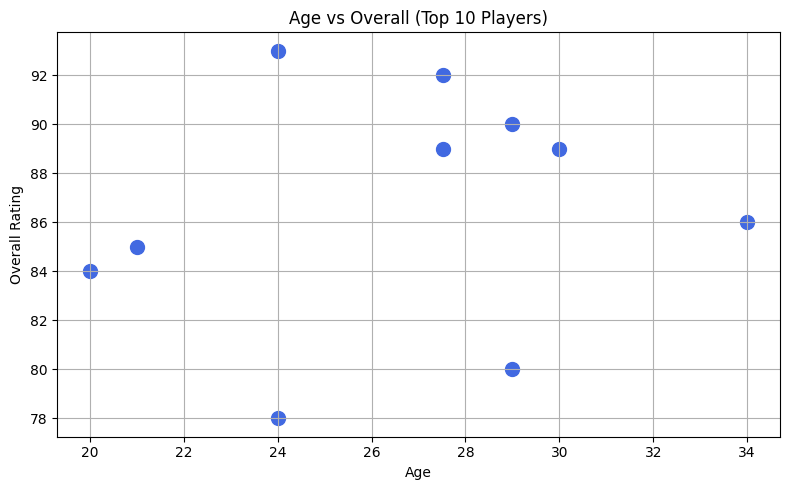

In [21]:
plt.figure(figsize=(8, 5))
plt.scatter(top_10['Age'], top_10['Overall'], color='royalblue', s=100)
plt.title('Age vs Overall (Top 10 Players)')
plt.xlabel('Age')
plt.ylabel('Overall Rating')
plt.grid(True)
plt.tight_layout()
plt.show()


In [22]:
# Save cleaned file
cleaned_fifa_dataset = fifa_data.copy()
cleaned_fifa_dataset.to_csv('cleaned_fifa_dataset.csv', index=False)